In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn')  # to get seaborn scatter plot

# read the csv file to extract data
def float_to_int(x): # function to convert float to integer (i.e.: 2014.0 to 2014)
    split_string = x.split(".") # splits input argument at decimal point, returns an array (i.e.: 2014.0 to [2014, 0])
    substring = split_string[0] # takes the value at the index 0 of new array (i.e.: 2014 of [2014, 0])
    if len(substring) > 0: # if the length of the substring is greater then 0 (which means, in the case that there is data in that cell) 
        return int(substring) # convert the substring to an integer, and return that integer
    else: # otherwise (in the case that there is no data in that cell)
        return '' # return an empty string


df = pd.read_csv('cleaned.csv', converters={'calendar_year': float_to_int})
# boston_filter = df[df.city == "Boston"]
# calendar_year = boston_filter['calendar_year']
# amount_awarded = boston_filter['amount_awarded']

# plt.scatter(calendar_year, amount_awarded, s=100, alpha=0.6, edgecolor='black', linewidth=1)
# plt.title('Boston City Payouts from 2010-2020')
# plt.xlabel('Year')
# plt.ylabel('Amount Awarded')

# plt.tight_layout()
# plt.show()

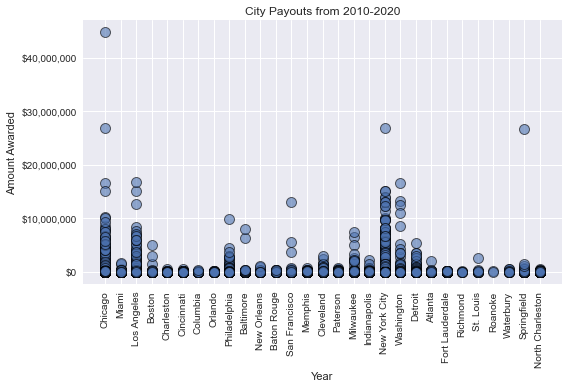

In [2]:
fig, ax = plt.subplots()
plt.scatter(df.city, df.amount_awarded, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('City Payouts from 2010-2020')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Amount Awarded')
ax.yaxis.set_major_formatter('${x:,.0f}') 


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 5 Highest Paying Cities From 2010 - 2020')

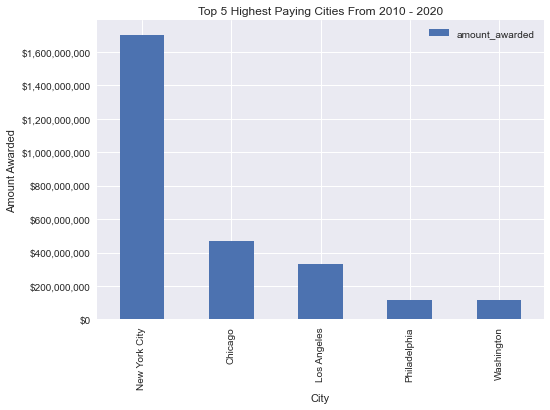

In [10]:
df2 = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round()
df2.sort_values(by=['amount_awarded'], ascending=False, inplace=True)
df3 = df2.head()
df4 = df3.plot(x="city", y=["amount_awarded"], kind="bar")
df4.yaxis.set_major_formatter('${x:,.0f}') # inserts $ value with commas and 0 zeros after the decimal point on the y axis (amount awarded)
df4.set_xlabel('City')
df4.set_ylabel('Amount Awarded')
plt.title('Top 5 Highest Paying Cities From 2010 - 2020')

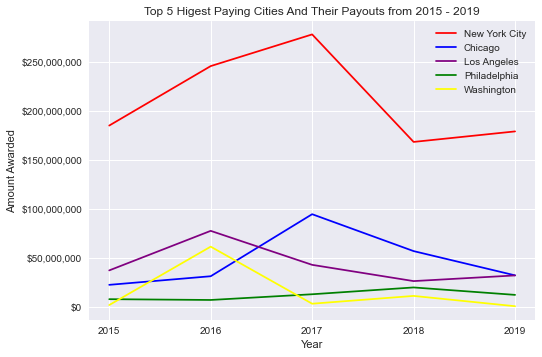

In [11]:
ax = plt.gca()

nyc_filter = df[df.city == "New York City"] # filters through the csv and pulls all the data with the string "Detroit" in the city column
nyc_sum = nyc_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
nyc_5 = nyc_sum.drop([0, 1, 2, 3, 4])
chicago_filter = df[df.city == "Chicago"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
chicago_sum = chicago_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
chicago_5 = chicago_sum.drop([0, 1, 2, 3, 4])
la_filter = df[df.city == "Los Angeles"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
la_sum = la_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
la_5 = la_sum.drop([0, 1, 2, 3, 4, 10])
philly_filter = df[df.city == "Philadelphia"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
philly_sum = philly_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
philly_5 = philly_sum.drop([0, 1, 2, 3, 4, 5])
washington_filter = df[df.city == "Washington"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
washington_sum = washington_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
washington_5 = washington_sum.drop([0, 1, 2, 3, 4, 5, 6])

nyc_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='red', label='New York City')
chicago_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='blue', label='Chicago')
la_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='purple', label='Los Angeles')
philly_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='green', label='Philadelphia')
washington_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='yellow', label='Washington')
ax.set_xlabel('Year')
ax.set_xticks([2015,2016,2017,2018,2019])
ax.set_ylabel('Amount Awarded')
plt.title('Top 5 Higest Paying Cities And Their Payouts from 2015 - 2019')
ax.yaxis.set_major_formatter('${x:,.0f}') # inserts $ value with commas and 0 zeros after the decimal point on the y axis (amount awarded)
plt.show()